In [48]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import time
import itertools

In [10]:
# Q1
np.dot([0.1, 0], [0, 0.1])

0.0

In [11]:
# 6.1
dataSet = [([1,0],-1), ([0,1],-1), ([0,-1],-1), ([-1,0],-1), ([0,2],1), ([0,-2],1), ([-2,0],1)]

In [12]:
euclidean_distance = lambda a, b: np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
sign_convert = lambda x: 1 if x > 0 else -1
transform = lambda x: [np.sqrt(x[0]**2+x[1]**2), np.arctan(float(x[1])/(x[0] + 0.00000000000001))] # avoid divided by zero

def kNearestNeighbour(data, point, k = 1):
  distance_list = [(euclidean_distance(point, x), y) for x, y in data]
  # sort and get k smallest
  distance_list.sort(key=lambda tup: tup[0])
  k_neighbors_val = [y for _, y in distance_list[:k]]
  return sign_convert(sum(k_neighbors_val))

def doKNN(data, xmin = -3, xmax = 3, ymin = -3, ymax = 3, k = 1, should_trans = False):
  xlist = np.linspace(xmin, xmax, 250)
  ylist = np.linspace(ymin, ymax, 250)
  X, Y = np.meshgrid(xlist, ylist)
  # Get all points within range
  Z = [zip(x_row, y_row) for x_row, y_row in zip(X, Y)]

  if should_trans:
    data = [(transform(x), y) for x, y in data]
    Z = [[transform(point) for point in row] for row in Z]

  Z = [[kNearestNeighbour(data, point, k) for point in row] for row in Z]

  return X, Y, Z 

# 6.1a
X1, Y1, Z1 = doKNN(dataSet)
X2, Y2, Z2 = doKNN(dataSet, k=3)
# 6.1b
X3, Y3, Z3 = doKNN(dataSet, should_trans=True)
X4, Y4, Z4 = doKNN(dataSet, k=3, should_trans=True)

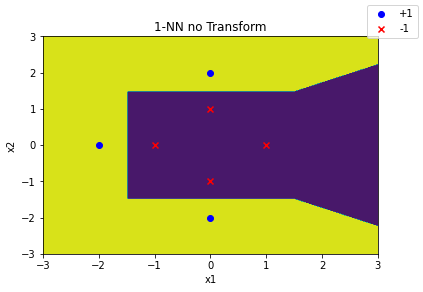

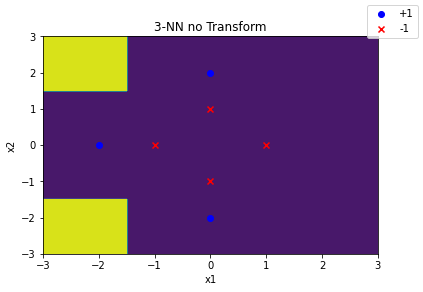

In [13]:
# From homework 6
def plot_features(*data):    
  fig, axs = plt.subplots(1)
  is_plus1 = []
  is_minus1 = []
  for d in data:
    for x, y in d:
      if y == 1:
        is_plus1.append(x)
      elif y == -1:
        is_minus1.append(x)
  

  axs.scatter(*zip(*is_plus1), color="blue", marker="o", label="+1", zorder=999)
  axs.scatter(*zip(*is_minus1), color="red", marker="x", label="-1", zorder=999)

  axs.set_xlabel("x1")
  axs.set_ylabel("x2")
  return fig, axs

def Q61a():
  fig, axs = plot_features(dataSet)
  axs.contourf(X1, Y1, Z1)
  axs.set_title('1-NN no Transform')
  fig.legend()   
  fig, axs = plot_features(dataSet)
  axs.contourf(X2, Y2, Z2)
  axs.set_title('3-NN no Transform')
  fig.legend()   

Q61a()

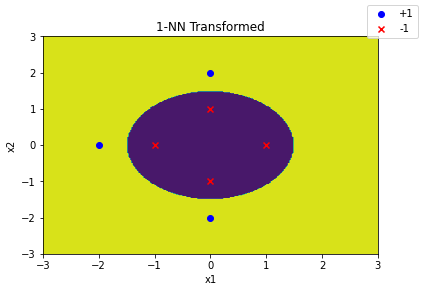

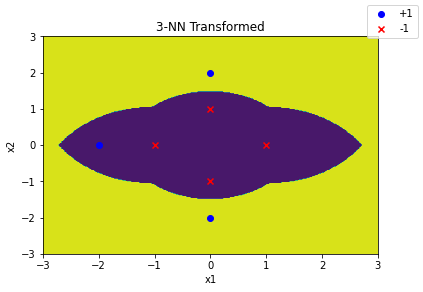

In [14]:
def Q61b():
  fig, axs = plot_features(dataSet)
  axs.contourf(X3, Y3, Z3)
  axs.set_title('1-NN Transformed')
  fig.legend()   
  fig, axs = plot_features(dataSet)
  axs.contourf(X4, Y4, Z4)
  axs.set_title('3-NN Transformed')
  fig.legend()   

Q61b()

In [15]:
# Q6.4

# From HW6
class Point:
    def __init__(self, x = 0.0, y = 0.0):
      self.x = x
      self.y = y
    
    def distance(self, point):
      return ((self.x - point.x) ** 2 + (self.y - point.y) ** 2 ) ** 0.5
    
    def __getitem__(self, key):
        if key == 0:
          return self.x
        if key == 1:
          return self.y
        
        raise "Point Class: Out of Bound"

class Disk: 
    # Direction: 1 goes up, -1 goes down
    def __init__(self, rad, thk, sep):
      self.rad = rad
      self.thk = thk
      self.sep = sep
      # Assume starting point at bottom left
      self.centerl = Point(rad * 2 + 1.5 * thk, thk + rad)
      self.centeru = Point(thk + rad, sep + thk + rad)
    
    def genPoints(self, num):
      self.points = []
      self.mark = []

      xstart = 0
      xend = (self.thk + self.rad) * 3 - self.thk / 2
      ystart = 0
      yend = (self.thk + self.rad) * 2 + self.sep

      lowerXStart = self.thk * 0.5 + self.rad
      lowerXEnd = xend
      lowerYStart = 0
      lowerYEnd = self.centerl.y

      upperXStart = 0
      upperXEnd = (self.thk + self.rad) * 2
      upperYStart = self.rad + self.thk + self.sep
      upperYEnd = upperYStart + self.rad + self.thk

      rangeMax = self.rad + self.thk

      while len(self.points) < num:
        # Randomly generate points within the rect to ensure uniform, pick points satisfied the equation.
        cx = np.random.uniform(xstart, xend)
        cy = np.random.uniform(ystart, yend)
        if lowerXStart <= cx <= lowerXEnd and lowerYStart <= cy <= lowerYEnd:
          p = Point(cx, cy)
          if self.rad <= p.distance(self.centerl) <= rangeMax:
            self.points.append(Point(cx, cy))
            self.mark.append(-1)
        elif upperXStart <= cx <= upperXEnd and upperYStart <= cy <= upperYEnd:
          p = Point(cx, cy)
          if self.rad <= p.distance(self.centeru) <= rangeMax:
            self.points.append(Point(cx, cy))
            self.mark.append(1)

    def plotDot(self, axs):
      x = [p.x for p in self.points]
      y = [p.y for p in self.points]
      axs.scatter(x, y, c=['blue' if m == 1 else 'red' for m in self.mark], zorder=999)


def runExp(rad = 10.0, thk = 5.0, sep = 5.0, data_num = 2000):
  calcy = lambda x1, result : (- result[0] / result[2]) - (result[1] * x1 / result[2])

  disk1 = Disk(rad, thk, sep)
  disk1.genPoints(data_num)
  print("{} Points generated".format(len(disk1.points)))


  data = [(x, y) for x, y in zip(disk1.points, disk1.mark)] # Zip can only be iterate once
  Xn, Yn, Zn = doKNN(data, -5, 50, -5, 40)
  fig, axs = plt.subplots()
  axs.contourf(Xn, Yn, Zn)
  axs.set_title('1-NN no Transform')
  disk1.plotDot(axs)
  fig.legend() 
  
  fig, axs = plt.subplots()
  X, Y, Z = doKNN(data, -5, 50, -5, 40, k = 3)
  axs.contourf(X, Y, Z)
  axs.set_title('3-NN no Transform')
  disk1.plotDot(axs)
  fig.legend()   

#runExp() # Slow!

In [42]:
# Q6.16
data_gen = lambda xmin, xmax, ymin, ymax, n: [((np.random.uniform(xmin, xmax), np.random.uniform(ymin, ymax)), 1) for i in range(n)]
uni_data = data_gen(0, 1, 0, 1, 10000)
uni_data_point = [x for x, y in uni_data]

def simpleCenter(data, n):
    # randomly selected first center
    first_loc = data[np.random.randint(0,len(data))][0]
    centers=[first_loc]
    
    # pick other n-1 centers
    for i in range(n-1):
        next_center=[0,0]
        max_dist = 0
        for point, _ in data:
            dist_all_centers=[euclidean_distance(point, center) for center in centers]
            dist_from_center_set = min(dist_all_centers)
            if dist_from_center_set > max_dist:
                next_center = point
                max_dist = dist_from_center_set                
        centers.append(next_center)
    return centers    

ls_avg = lambda ls: sum(ls) / len(ls)
cls_split = lambda c: ([x for [x, _] in c], [x for [_, x] in c])
min_idx = lambda ls: ls.index(min(ls))

def cluster(data, n, iterations=3):
    centers = simpleCenter(data, n)
    for i in range(iterations):
        clustered_data=[(center,[]) for center in centers]
        # assign points to centers
        for point, _ in data:
            dist_to_centers = [euclidean_distance(point, center) for center in centers]
            clustered_data[min_idx(dist_to_centers)][1].append(point)
        # recalculate centers (average)
        centers = []
        for [center,cluster] in clustered_data:
            x1, x2 = cls_split(cluster)
            center_x1, center_x2 = ls_avg(x1), ls_avg(x2)
            centers.append((center_x1, center_x2))
    
    return clustered_data

simple_center = simpleCenter(uni_data, 10)
clustered_center = cluster(uni_data, 10)

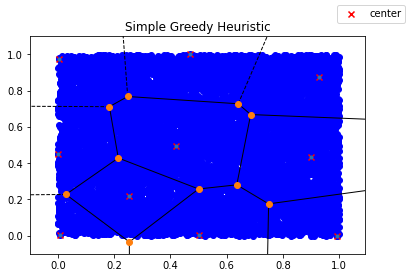

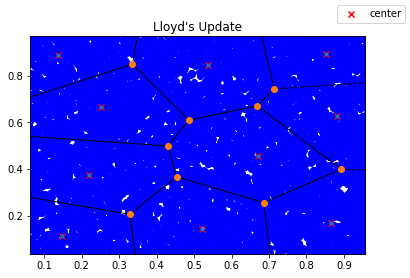

In [59]:
def runCenter(center, data):
  vor = Voronoi(center)
  fig = voronoi_plot_2d(vor)
  axs = fig.axes[0]
  axs.scatter(*zip(*data), color="blue", marker="o")
  axs.scatter(*zip(*center), color="red", marker="x", label="center")
  return fig, axs

fig, axs = runCenter(simple_center, uni_data_point)
axs.set_title("Simple Greedy Heuristic")
fig.legend()
fig, axs = runCenter([center for center, _ in clustered_center], uni_data_point)
axs.set_title("Lloyd's Update")
fig.legend()

In [50]:
query_point = data_gen(0, 1, 0, 1, 10000)

# Brute Force
start = time.time()
for p, _ in query_point:
  kNearestNeighbour(uni_data, p) # Similar behavior, for time comparison purpose
start = time.time() - start
print("Brute Force: {}".format(start))


start = time.time()
for p, _ in query_point:
  # first, find center that closest to the point
  dist = [euclidean_distance(center, p) for center, _ in clustered_center]
  points = clustered_center[dist.index(min(dist))][1]
  kNearestNeighbour(zip(points, itertools.repeat(100)), p)
start = time.time() - start
print("Branch and Bound: {}".format(start))

Brute Force: 220.97171306610107
Branch and Bound: 21.145105600357056


In [64]:
def gaussianDist(num_center=10, num_points = 10000, scale = 0.1):
  # 10 centers
  points = []
  centers = [x for x, _ in data_gen(0, 1, 0, 1, num_center)]
  for i in range(num_points - num_center):
    current_center = centers[random.randint(0, num_center - 1)]
    points.append(np.random.normal(loc=current_center, scale=scale))
  
  points += centers

  return points, [(x, 1) for x in points]

gaussian_dataset_point, gaussian_dataset = gaussianDist()

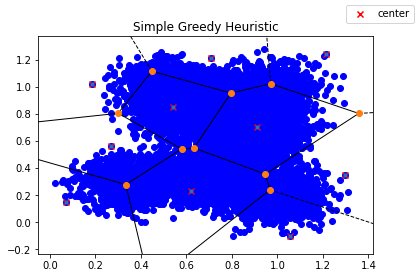

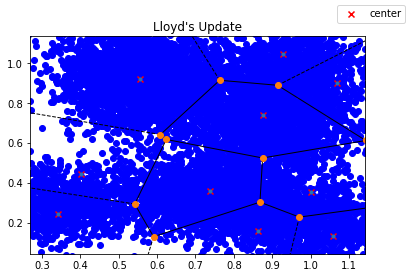

In [66]:
simple_center_gaussian = simpleCenter(gaussian_dataset, 10)
clustered_center_gaussian = cluster(gaussian_dataset, 10)
fig, axs = runCenter(simple_center_gaussian, gaussian_dataset_point)
axs.set_title("Simple Greedy Heuristic")
fig.legend()
fig, axs = runCenter([center for center, _ in clustered_center_gaussian], gaussian_dataset_point)
axs.set_title("Lloyd's Update")
fig.legend()

In [67]:
# Brute Force
start = time.time()
for p, _ in query_point:
  kNearestNeighbour(gaussian_dataset, p) # Similar behavior, for time comparison purpose
start = time.time() - start
print("Brute Force: {}".format(start))


start = time.time()
for p, _ in query_point:
  # first, find center that closest to the point
  dist = [euclidean_distance(center, p) for center, _ in clustered_center_gaussian]
  points = clustered_center[dist.index(min(dist))][1]
  kNearestNeighbour(zip(points, itertools.repeat(1)), p)
start = time.time() - start
print("Branch and Bound: {}".format(start))

Brute Force: 432.4296154975891
Branch and Bound: 21.465482711791992
